<a href="https://colab.research.google.com/github/mwelland/ENGPYHS_3NM4/blob/main/Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolation

Interpolation is a more fundamental concept since it was historically *easier* to do, either direclty as a local process and/or adding new information as it was obtained.   

We need to consider a few things for interpolation:
* Speed of building the model
* Speed of adding new data to the model
* Speed of execution for interpolated values
* Generalizability to N-D

The methods discussed here rely on a fundamental property of linear algebra:
**It is always possible to construct a *unique* polynomial of degree $n$ that passes through $n + 1$ distinct data points!**

#### Example: Interpolating a Gaussian curve

For illustrative purposes, let's design a toy problem for exploration:

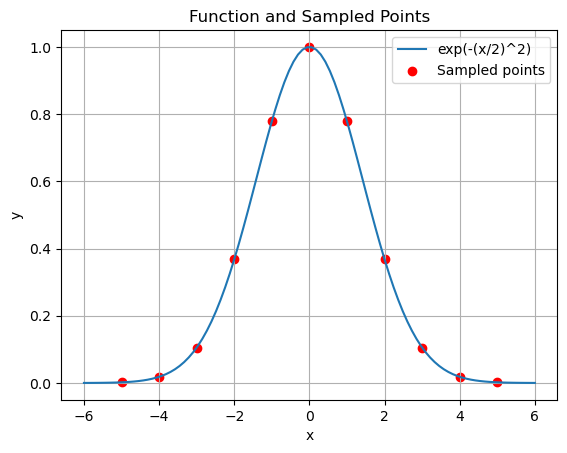

x_d: [-5 -4 -3 -2 -1  0  1  2  3  4  5]
y_d: [0.00193045 0.01831564 0.10539922 0.36787944 0.77880078 1.
 0.77880078 0.36787944 0.10539922 0.01831564 0.00193045]


In [1]:
# prompt: Plot the function exp(-(x/2)^2) from -5 to 5. Then sample 11 times at 1 intervals,  marking the points on the plot and outputting the results as x_d and y_d

import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
  return np.exp(-(x/2)**2)

# Create x values for plotting
x_toy = np.linspace(-6, 6, 100)
y_toy = f(x_toy)

# Sample 11 times at 1-interval intervals
x_d = np.arange(-5, 6, 1)
y_d = f(x_d)

# Plot the function and sampled points
plt.plot(x_toy, y_toy, label='exp(-(x/2)^2)')
plt.scatter(x_d, y_d, color='red', label='Sampled points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Function and Sampled Points')
plt.grid(True)
plt.show()

print("x_d:", x_d)
print("y_d:", y_d)


Our goal is to use the sampled data (the red points) and recover the 'true' function (in blue) as faithfully as possible.